# **DATA PREPROCESSING**

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [7]:
df[df['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [8]:
df.dropna(inplace=True)
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [9]:
df.duplicated().sum()
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [10]:
df[(df['clean_comment'].str.strip() == ' ')].sum()

clean_comment    0
category         0
dtype: object

In [11]:
#converting all data in lower case
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [12]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].sum()

clean_comment     family mormon have never tried explain them t...
category                                                      6717
dtype: object

In [13]:
# intentifying comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comment_with_url = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comment_with_url.sum()

clean_comment    0
category         0
dtype: object

In [14]:
# identifying comments contaning new line chahcters
comment_with_newline = df[df['clean_comment'].str.contains('\n')]
comment_with_newline.sum()

clean_comment     pretty sure this sarcasm satire the news 1500...
category                                                       119
dtype: object

In [15]:
# remove newline comment from clean comment
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)
comment_with_newline_remaining = df['clean_comment'].str.contains("\n")
comment_with_newline_remaining.sum()

np.int64(0)

# **EDA**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='category', ylabel='count'>

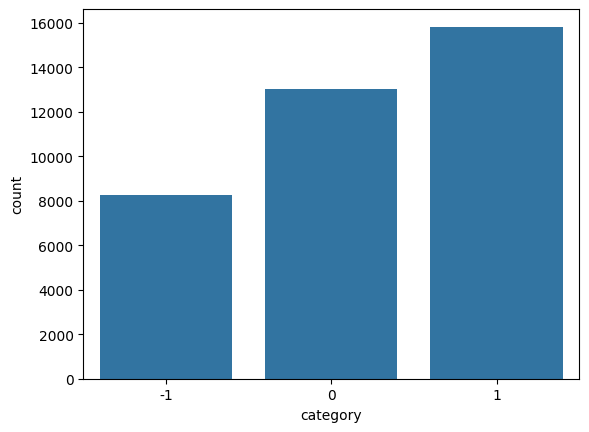

In [17]:
sns.countplot(data=df, x="category")

In [18]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.61
 0    35.11
-1    22.28
Name: proportion, dtype: float64

In [19]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)

,clean_comment,category,word_count
3961,twitter right now mamta bannerjee delhi elex ...,-1,50
34796,would have given permission such cliche,0,6
23851,saw this yescompanionimbecil,0,3
4926,don understand the big deal here hasnt the co...,1,52
25977,this sure sink bjp 2019,1,5


In [20]:
df['word_count'].describe()

count    37149.000000
mean        29.403833
std         56.586989
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

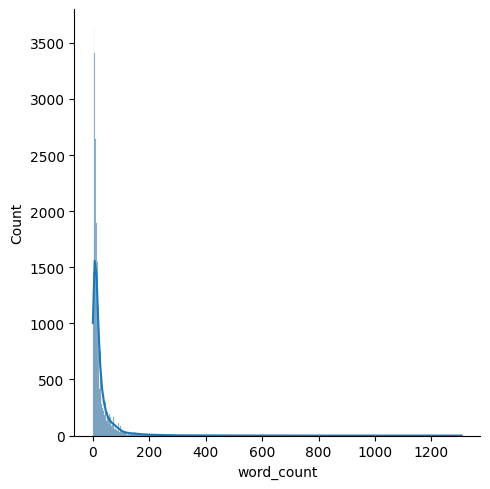

In [21]:
sns.displot(df['word_count'], kde=True)

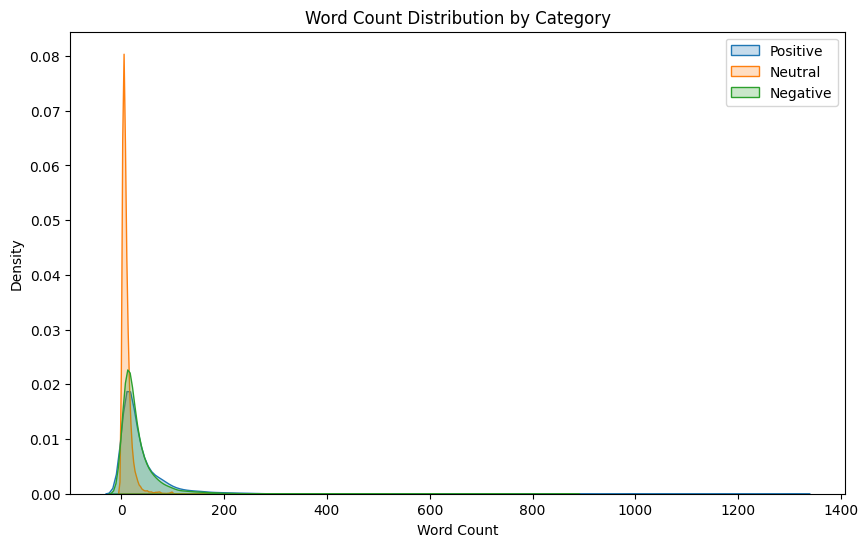

In [22]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

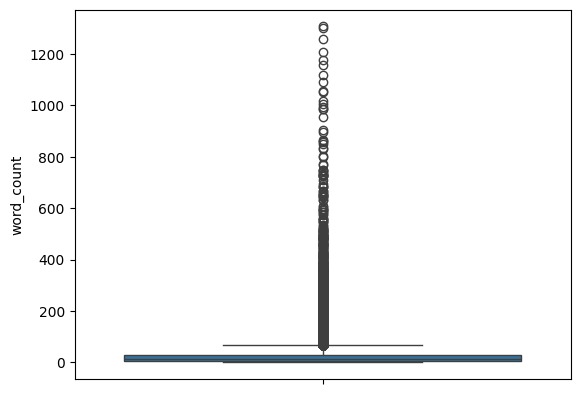

In [23]:
sns.boxplot(df['word_count'])

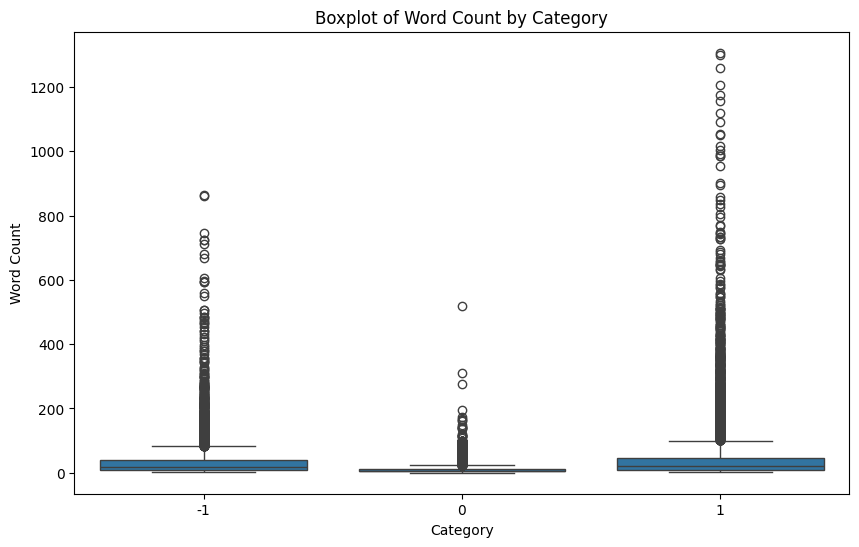

In [24]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

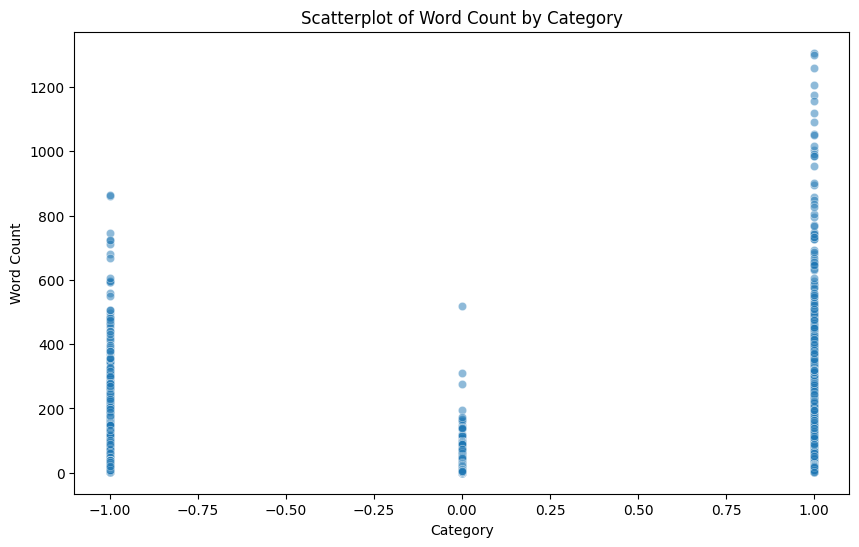

In [25]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

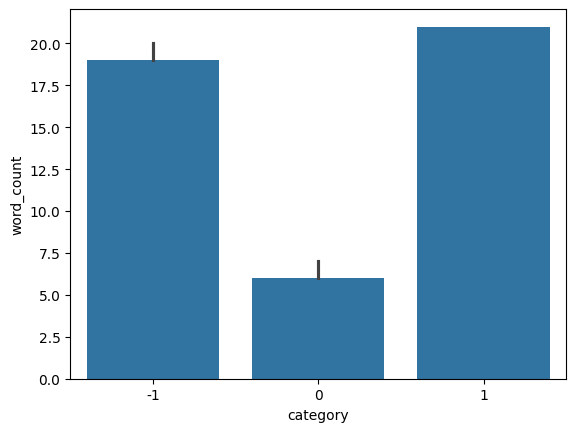

In [26]:
sns.barplot(df,x='category',y='word_count',estimator='median')

In [27]:
from nltk.corpus import stopwords

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohitrohda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [30]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
2071,wonder how many people think canada place pla...,1,28,8
2026,that goal gets funnier with every replay,0,7,2
10557,felt betrayed when saw poor people standing l...,1,17,4
6950,times now first denies airing doctored video ...,-1,87,33
12748,modi has tried hard since may 2014 shed his c...,1,25,5


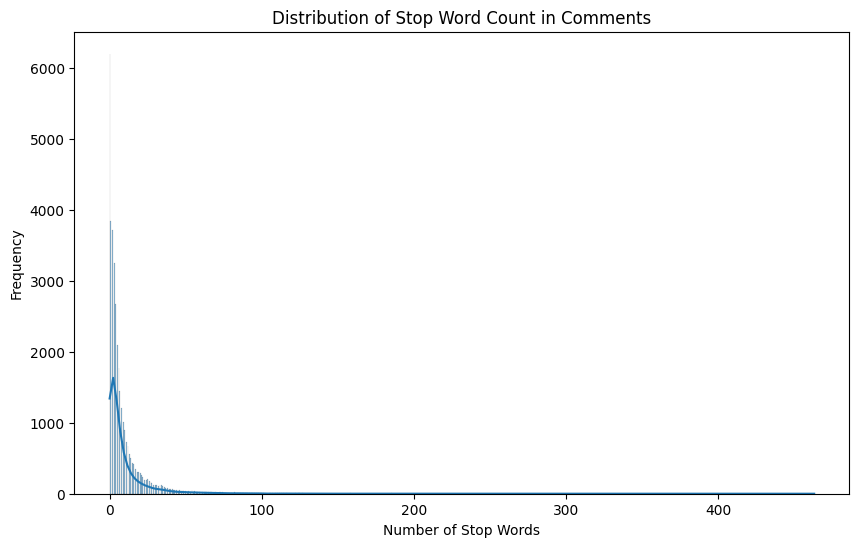

In [31]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


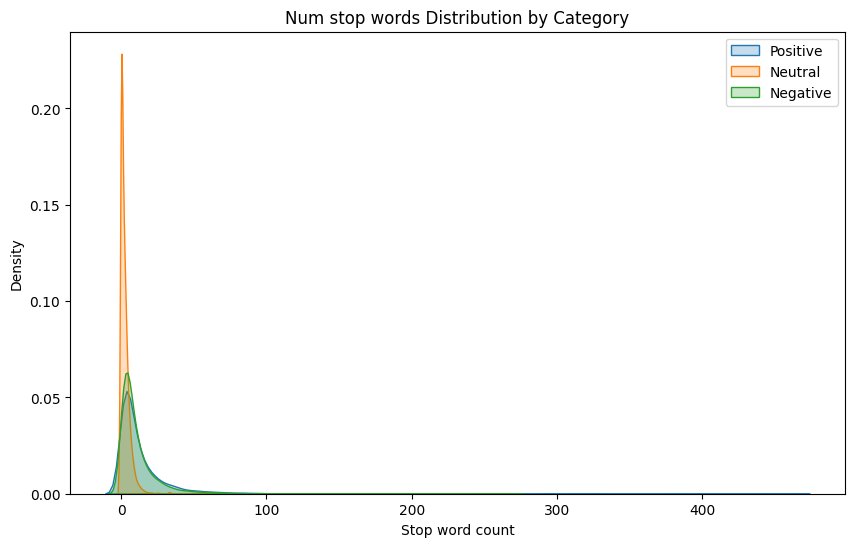

In [32]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [33]:
df.sample(10)

,clean_comment,category,word_count,num_stop_words
18896,nel quinto insieme does not exist dovrebbe ess...,0,17,2
1988,geez take the point guess,0,5,1
19855,think the intention good really means otherwi...,1,17,6
4049,there are three kinds people lucky unlucky sha...,1,9,2
29031,people need understand that pow would not answ...,-1,42,18
4431,,0,0,0
11913,watch trump say ordered the people from the ai...,0,15,5
22097,means end,0,2,0
23583,ोीी ो टकले ैं top top kek kek not offending y...,1,21,4
31050,did you just repost atul khatri what,0,7,4


<Axes: xlabel='category', ylabel='num_stop_words'>

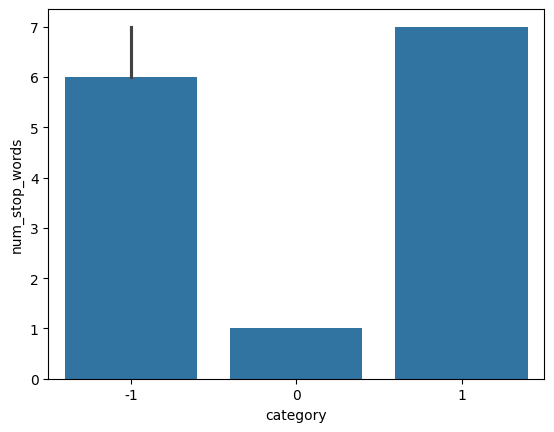

In [34]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')


In [35]:
print(df['num_stop_words'].describe())
print(df['num_stop_words'].dtype)

count    37149.000000
mean         9.751918
std         19.312388
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        463.000000
Name: num_stop_words, dtype: float64
int64


/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_89645/101498387.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


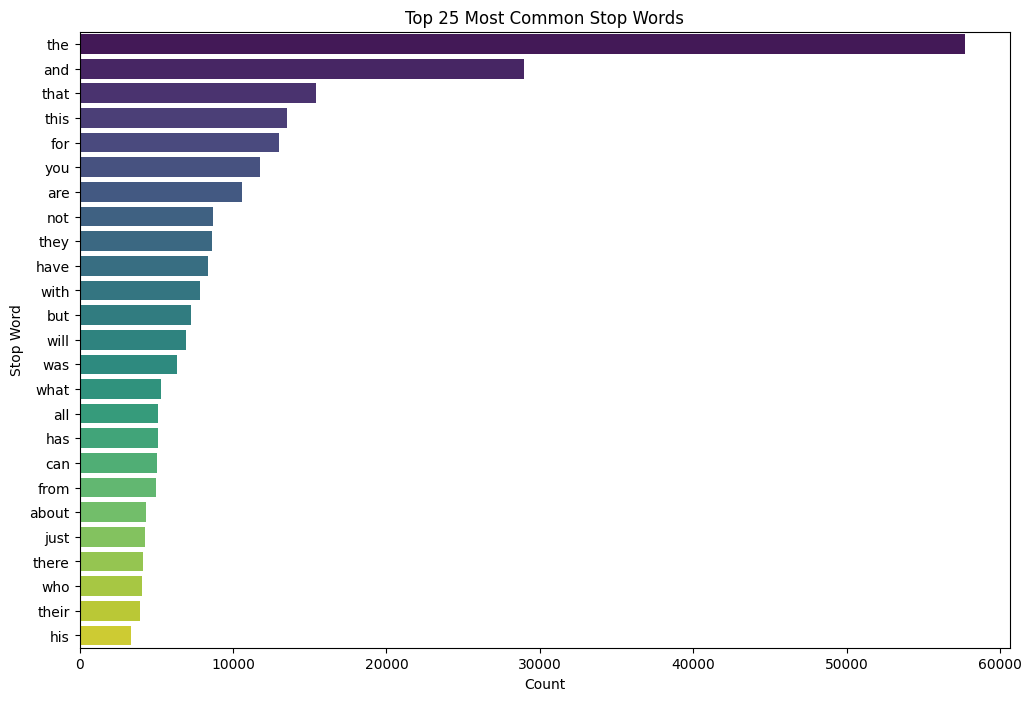

In [36]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()
